In [1]:
from gates import *
from states import *
from measurements import *
from utils import *
import matplotlib.pyplot as plt

In [2]:
n = 100

In [3]:
state = np.array([0.17,-0.56j,-0.73,0.35j])
state = state.reshape(4,1)
rho = np.kron(state,state.conj().T)

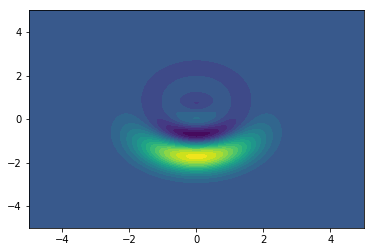

In [4]:
xvec = np.linspace(-5,5,200)
W = wigner_iterative(rho, xvec, xvec)
cont0 = plt.contourf(xvec, xvec, W, 20)
plt.show()

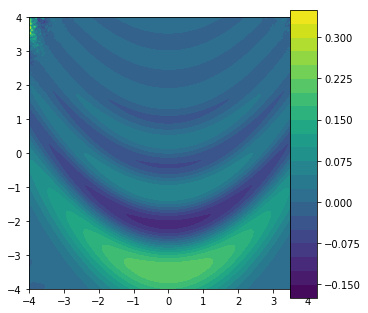

In [5]:
init_state = np.zeros((1, n))
init_state[:,0] = 1.
gate0 = F_gate(1, n)
gate1 = S_gate(np.array([1.35]), np.array([0.]), n) # squeezing
gate2 = V_gate(np.array([0.1]), n)   # cubic gate
state = np.einsum('ijk,ik->ij', gate1, init_state)
# state = init_state
state = np.einsum('ijk,ik->ij', gate0, state)
state = np.einsum('ijk,ik->ij', gate2, state)
state = state.reshape(n,1)
rho = np.kron(state,state.conj().T)
plt.figure(figsize=[5,5])
xvec = np.linspace(-4, 4, 200)
yvec = np.linspace(-0, 4, 200)
W = wigner_iterative(rho, xvec, yvec)
cont0 = plt.contourf(xvec, xvec, W, 20)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

In [6]:
a = np.zeros((10, 10, 10))

In [7]:
from scipy.linalg import expm
print(expm(0.5j*a[0]))

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [12]:
%%time
n = 50
init_state = np.zeros((10, n))
init_state[:,0] = 1.
gate0 = P_gate(10, n)
state = np.einsum('ijk,ik->ij', gate0, init_state)

CPU times: user 298 ms, sys: 287 ms, total: 585 ms
Wall time: 86.7 ms


In [14]:
%%time
n = 50
meas_X_theta(state, 0, n)

CPU times: user 1.3 s, sys: 736 ms, total: 2.04 s
Wall time: 877 ms


(array([4.000e+00, 3.000e+00, 4.000e+00, 0.000e+00, 1.500e+01, 5.160e+02,
        1.369e+03, 2.239e+03, 3.002e+03, 2.848e+03]),
 array([-14.044 , -11.1596,  -8.2752,  -5.3908,  -2.5064,   0.378 ,
          3.2624,   6.1468,   9.0312,  11.9156,  14.8   ]),
 <a list of 10 Patch objects>)

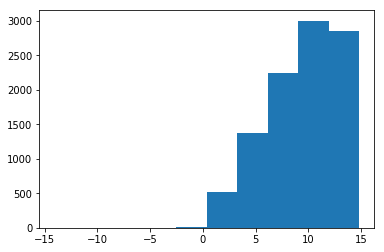

In [10]:
plt.hist(meas_X_theta(state, 0, n)[0])

In [23]:
%%time
probs = np.zeros((10,10))
probs[:,1] = 1.
x = [1,2,3,4,5,6,7,8,9,10]
data = np.random.choice(x, size=100000, p=probs[1,:])

CPU times: user 4.12 ms, sys: 0 ns, total: 4.12 ms
Wall time: 5.08 ms


In [28]:
%%time
def myfunc(a, b):
...     "Return a-b if a>b, otherwise return a+b"
...     if a > b:
...         return a - b
...     else:
...         return a + b
vfunc = np.vectorize(myfunc)
vfunc([1, 2, 3, 4], [2,3,4,5])

CPU times: user 107 µs, sys: 47 µs, total: 154 µs
Wall time: 160 µs


In [40]:
from scipy.linalg import expm
def func(a):
    return expm(a)

In [41]:
vfunc = np.vectorize(func)

In [45]:
expm(a)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [46]:
a = np.zeros((10,10))
vfunc(a)

ValueError: expected a square matrix

# Testing Measurements

In [6]:
n_photons = 20
state = np.zeros(20)
state[4] = 1.
dataset = meas_X_theta(state, 0., n_photons)

Done


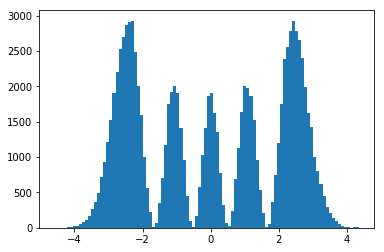

In [7]:
plt.hist(meas_X_theta(state, 0., n_photons), bins=100)
print('Done')